As a first example, we'll start with a simple question: what is the average birth weight of babies in the United States? To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it. Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

In [1]:
#Import pandas
import pandas as pd
import h5py
import numpy as np

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
type(nsfg)

pandas.core.frame.DataFrame

Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5. The result from read_hdf() is a DataFrame, which is the primary data structure Pandas uses to store data.

In [2]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


nsfg contains one row for each pregnancy for each of the women.

In [3]:
nsfg.shape

(9358, 10)

The DataFrame has an attribute called shape, which is the number of rows and columns; there are 9358 rows in this dataset, one for each pregnancy, and 10 columns, one for each variable. 

The DataFrame also has an attribute called `columns`, which is an Index. That's another Pandas data structure, similar to a list; in this case it's a list of variables names, which are strings.

In [4]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
pounds = nsfg['birthwgt_lb1']

We can select a column from a DataFrame using the bracket operator, with a string as the key. The result is a Series, which is another Pandas data structure. In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

In [6]:
type(pounds)

pandas.core.series.Series

In [7]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

#############################################################

### Clean and Validate

In [8]:
#Selecting columns
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [9]:
pounds.value_counts()

7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64

In [10]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [11]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [12]:
#Replacing
pounds = pounds.replace([98, 99], np.nan)

In [13]:
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [14]:
#For ounces
ounces.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [15]:
ounces.value_counts()

0.0     757
6.0     543
8.0     518
2.0     429
11.0    418
5.0     407
3.0     393
12.0    388
4.0     386
9.0     377
7.0     346
1.0     297
10.0    295
13.0    275
15.0    268
14.0    258
99.0     35
98.0      1
Name: birthwgt_oz1, dtype: int64

In [16]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [17]:
#Replacing without assigning to another variable
ounces.replace([98, 99], np.nan, inplace = True)

In [18]:
ounces.describe()

count    6355.000000
mean        6.694099
std         4.533847
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        15.000000
Name: birthwgt_oz1, dtype: float64

In [19]:
#Performing Arithmetic with series
birth_weight = pounds + ounces/16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [20]:
##Example
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace = True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [21]:
##Example
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


#######################################################################

### Filter and Visualize

In [22]:
import matplotlib.pyplot as plt

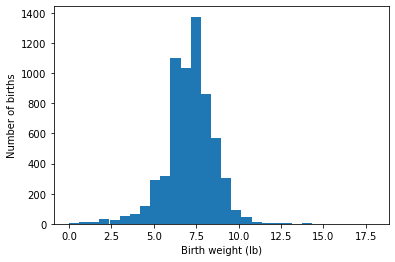

In [23]:
plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel("Birth weight (lb)")
plt.ylabel("Number of births")
plt.show()

In [24]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [25]:
preterm.sum()

3742

In [26]:
preterm.mean()

0.39987176747168196

In [27]:
#Filtering
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [28]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

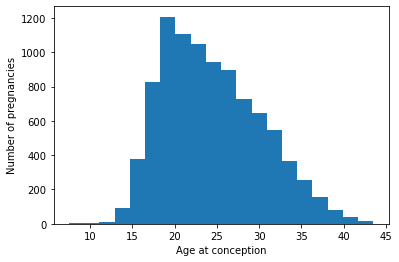

In [29]:
##Example
# Plot the histogram
plt.hist(agecon, bins = 20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

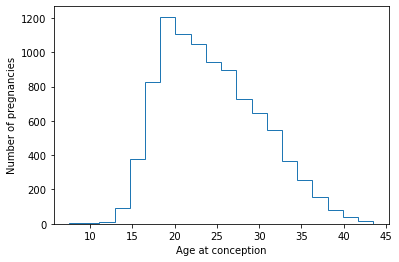

In [30]:
##Example
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [31]:
##Example
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


#### Resampling

The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are "oversampled". Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling.